# INTRODUCTION

## Project scope:
Project focused on Social Media Analytics and Text Mining topics in the context of 2020 US Presidential Elections.
** The aim of the project ** is to investigate the posts of Tweeter users that were created in the pre-election period for the presidency of the United States of America in 2020.

** The subject of the study ** are posts about the candidates for the US presidency - J. Biden and D. Trump. Thus, these are not candidates' posts, but posts about candidates.

During the analysis, we tried to find answers to the following questions:
1. How did the residents of the USA and other countries express themselves about the candidates?
2. Which languages were used most often?
3. What form of application (web, mobile, etc.) was most often used to post entries?
4. What was the activity of Twitter users writing about the candidates? What could this activity be related to?
5. What were the most common words?
6. Which posts about a given candidate were more opinions and which were facts?
7. As well as - ** On the basis of the collected data, it can be stated that the election results were falsified, or was the counting of votes correct? **

## Dataset:
The data comes from https://www.kaggle.com/manchunhui/us-election-2020-tweets

The author of the database used in the project is Manch Hui.

The data consists of tweets shared between October 15, 2020 and November 8, 2020. Entries apply to both candidates - D. Trump and J. Biden.

In [ ]:
# library import
import pandas as pd

In [ ]:
# data import

from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive
!ls

tweets_biden = pd.read_csv("C:/Users/blaze/Desktop/Projects/Uni/Text Mining + Analiza Sieci Spolecznosciowych - Projekt (Py)/data-20210622/hashtag_joebiden.csv",
                           lineterminator='\n',
                           parse_dates = True)
tweets_trump = pd.read_csv("C:/Users/blaze/Desktop/Projects/Uni/Text Mining + Analiza Sieci Spolecznosciowych - Projekt (Py)/data-20210622/hashtag_donaldtrump.csv",
                           lineterminator='\n',
                           parse_dates = True)

# Ameryka to Ameryka 
tweets_biden['country'].replace({'United States':'United States of America'}, inplace = True)
tweets_trump['country'].replace({'United States':'United States of America'}, inplace = True)

In [ ]:
tweets_biden.head

NameError: name 'tweets_biden' is not defined

## WSTĘPNA EKSPLORACJA DANYCH

### Braki danych

Na tym etapie przeprowadzono wstępną analizę danych, która między innymi umożliwia oszacowanie braków danych w zbiorze. Duża liczba braków danych w danej zmiennej negatywnie wpływa na dalszą możliwość użycia tejże cechy w kolejnym kroku badania.

In [ ]:
#



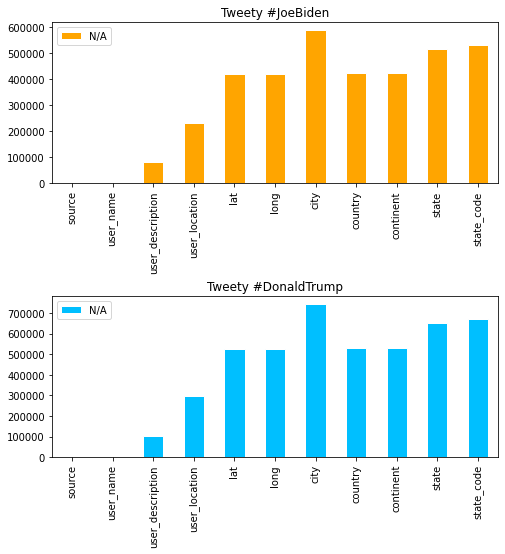

In [ ]:
# braki danych
na_vals_b=pd.DataFrame({'N/A':tweets_biden.isna().sum()})
na_vals_b=na_vals_b.loc[na_vals_b['N/A'] > 0]
na_vals_t=pd.DataFrame({'N/A':tweets_trump.isna().sum()})
na_vals_t=na_vals_t.loc[na_vals_t['N/A'] > 0]

# wykresy
barcolors = ['olivedrap','mediumslateblue','lightpink','orange','lightcoral','palegreen','deepskyblue','Grey']
barstyle = {"edgecolor":"white", "linewidth":1}
fig, ax=plt.subplots(2,1, figsize=(8,8), gridspec_kw={'hspace':0.7})

na_vals_b.plot.bar(color=barcolors[3], **barstyle, ax=ax[0])
ax[0].set_title('Tweety #JoeBiden')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

na_vals_t.plot.bar(color=barcolors[6], **barstyle, ax=ax[1])
ax[1].set_title('Tweety #DonaldTrump')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

Wizualizacje przedstawiają cechy posiadające w swoim rozkładzie braki danych. 
Warto zwrócić uwagę na wyjątkowo dużą ilość braków danych odnoszących się do zmiennych geograficznych (60% i więcej). Prawdopodobnie jest to związane z tym, że niewielu użytkowników zamieszcza wpisy wraz z geolokalizacją.

Takich danych należy używać z ostrożnością. Mimo, że niewielkie liczności braków danych nie stanowią problemu w analizach statystycznych. Duża ich ilość może jednak poddawać pod wątpliwość rzetelność przeprowadzonych badań.



### HEATMAP (żródło, kraj)

Przy użyciu mapy cieplnej możliwym jest wizualizacja najczęściej używanych aplikacji, z których użytkownicy Twittera udostępniali wpisy nt. wyborów oraz kandydatów. Dodatkowo, widoczna jest informacja na temat lokalizacji kraju udostępnienia wpisu. Ze względu na to, że tweetów z geolokalizacją przyporządkowanych do USA jest najwięcej, a także bazując na tym, że USA postrzegane są w kategoriach lidera w aspekcie ekonomii, praw człowieka, czy nauki - wybory prezydenckie w tym kraju obserwowane są przez osoby z całego świata.

---

Idea heatmapy - artykuł **A story told through a heatmap** w serwisie Kaggle.

In [ ]:
# łączenie danych dla mapy cieplnej
source_df=pd.concat([tweets_biden[['source','tweet','country']].copy(),tweets_trump[['source','tweet','country']].copy()])
source_df['country'].replace({'United States of America':'United States'}, inplace=True)
source_df=source_df.fillna('Geo Data NA')
source_df=source_df.drop_duplicates()

#aplikacje
sources=pd.DataFrame(source_df.groupby(['source'])['tweet'].count().sort_values(ascending=False)[:6])
sources=sources.reset_index()
sourceslst=sources.source.to_list()

#kraje
country=pd.DataFrame(source_df.groupby(['country'])['tweet'].count().sort_values(ascending=False)[:6])
country=country.reset_index()
countrylst=country.country.to_list()

platXtab=pd.DataFrame(source_df.groupby(['source','country'])['tweet'].count().unstack().fillna(0))

In [ ]:
# funkcje pomocnicze i argumenty dla kolejnych wizualizacji
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm  

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

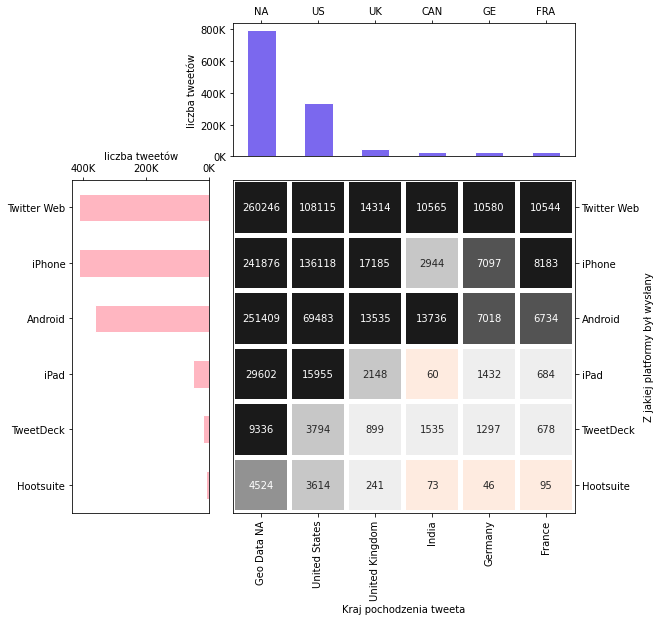

In [ ]:
# HEATMAP
fig, ax=plt.subplots(2,2, figsize=(9,9), 
                     gridspec_kw={'height_ratios':[2,5], 'width_ratios':[2,5], 'wspace':0.1, 'hspace':0.1})

hide_ax = ax[0,0]
hide_axes(hide_ax)

hm_ax = ax[1,1]
draw_heatmap1(platXtab.loc[sourceslst,countrylst], hm_ax)
hm_ax.set_xlabel('Kraj pochodzenia tweeta')
hm_ax.set_ylabel('Z jakiej platformy był wysłany')
hm_ax.set_yticklabels(('Twitter Web','iPhone','Android','iPad','TweetDeck','Hootsuite'), rotation=0) 

bar_ax = ax[0,1]
platXtab.loc[sourceslst,countrylst].sum().plot.bar(ax=bar_ax, color=barcolors[1],**barstyle)
bar_ax.set_xlabel(bar_ax.get_xlabel())
bar_ax.xaxis.tick_top()
bar_ax.xaxis.set_label_position("top")
bar_ax.yaxis.set_major_formatter(formatterK1)
bar_ax.set_xticklabels(('NA', 'US', 'UK', 'CAN', 'GE','FRA'), rotation=0) 
bar_ax.set_xlabel('')
bar_ax.set_ylabel('liczba tweetów')

barh_ax = ax[1,0]
platXtab.loc[sourceslst,countrylst].sum(axis=1)[::-1].plot.barh(ax=barh_ax, color=barcolors[2],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK1)
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_yticklabels(('Hootsuite','TweetDeck','iPad','Android','iPhone','Twitter Web'), rotation=0) 
barh_ax.set_xlabel('liczba tweetów')
barh_ax.set_ylabel('')
plt.show()



> Większość tweetów (na temat obu kandydatów) była opublikowane poprzez stronę internetową Twittera, a również poprzez jego aplikacje dla iPhone i Android. 



> W większości przypadków tweety nie zawierały geotaga, a te, które zawierały, pochodziły z USA. Kolejne kraje z których najczęściej zamieszczano wpisy to kolejno UK, Kanada, Niemcy i Francja.








### Mapa geograficzna

W celu pełniejszej prezentacji mnogości miejsc z których udostępniano wpisy postanowiono umieścić cechy 'lat' oraz 'long' (czyli współrzędne geograficzne) na mapie.



In [ ]:
# przygotowanie danych do mapowania
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
from shapely.geometry import Point, Polygon
crs = {'init': 'EPSG:4326'}

tmp=pd.concat([tweets_biden[['lat','long']].copy(),tweets_trump[['lat','long']].copy()])
tmp=tmp.dropna()
geometry = [Point(xy) for xy in zip(tmp['long'],tmp['lat'])]
geo_df=gpd.GeoDataFrame(tmp, crs=crs, geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



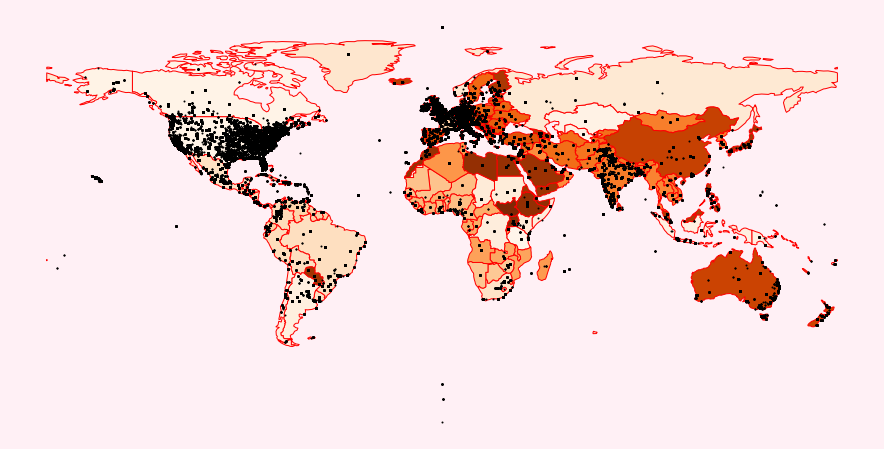

In [ ]:
# mapa
fig, ax = plt.subplots(1,figsize=(16,8), facecolor='lavenderblush')
world = world[world.name != "Antarctica"]
world.plot(ax=ax, cmap='Oranges', edgecolors='red')
geo_df.plot(ax=ax, markersize=1, color='black', marker='o')
ax.axis('off')
plt.show()



> Z danej mapy wynika, że o wyborach w USA pisali nie tylko mieszkańcy Ameryki, ale i innych krajów.

> Duża liczba tweetów pochodzi z Europy Zachodniej, Indii, Australii, Meksyku, Wenezueli oraz Kolumbii. 


> Natomiast nie we wszystkich stanach USA użytkownicy Twittera pisali z jednakową aktywnością. Zapewne ma to związek z gęstością zaludnienia poszczególnych Stanów, albowiem stany "środkowe" charakteryzują się ogólną wyższą żyznością gleb przez co pełnią rolę swoistego spichlerza Stanów Zjednoczonych.







### Szereg czasowy liczby tweetów na godzinę

Poniższa wizualizacja przedstawia częstotliwość zamieszczania wpisów przez danych użytkowników w badanym okresie czasu. Celem jest przedstawienie możliwie występujących trendów oraz określenie odchyleń.

In [ ]:
# zmiana typu zmiennej na datetime object
tweets_biden['user_join_date']=pd.to_datetime(tweets_biden['user_join_date'])
tweets_trump['user_join_date']=pd.to_datetime(tweets_trump['user_join_date'])
tweets_biden['collected_at']=pd.to_datetime(tweets_biden['collected_at'])
tweets_trump['collected_at']=pd.to_datetime(tweets_trump['collected_at'])
tweets_biden['created_at']=pd.to_datetime(tweets_biden['created_at'])
tweets_trump['created_at']=pd.to_datetime(tweets_trump['created_at'])

# utworzenie dodatkowej cechy czasowej
tweets_biden['created_at_r']=tweets_biden['created_at'].dt.strftime('%Y-%m-%d %H')
tweets_trump['created_at_r']=tweets_trump['created_at'].dt.strftime('%Y-%m-%d %H')
tweets_biden['created_at_r2']=tweets_biden['created_at'].dt.strftime('%m-%d')
tweets_trump['created_at_r2']=tweets_trump['created_at'].dt.strftime('%m-%d')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



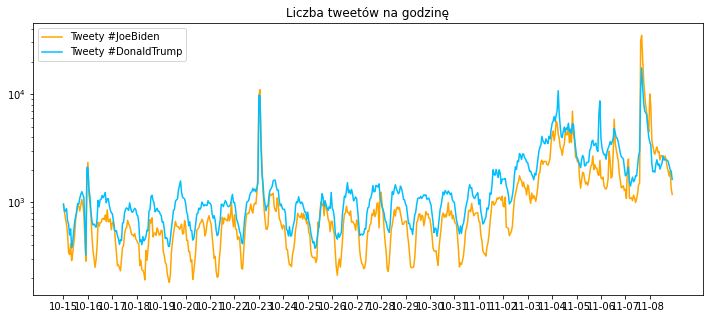

In [ ]:
# przygotowanie danych
common_ids=np.intersect1d(tweets_biden.user_id, tweets_trump.user_id)
common_b=tweets_biden[tweets_biden.user_id.isin(common_ids)].copy()
common_t=tweets_trump[tweets_trump.user_id.isin(common_ids)].copy()

common_df=pd.concat([common_b,common_t])
common_df=common_df.drop_duplicates()

common_creat=np.intersect1d(tweets_biden.created_at_r, tweets_trump.created_at_r)
cnt_tbiden=tweets_biden[tweets_biden.created_at_r.isin(common_creat)]['created_at_r'].value_counts().sort_index()
cnt_ttrump=tweets_trump[tweets_trump.created_at_r.isin(common_creat)]['created_at_r'].value_counts().sort_index()

# szereg czasowy
plt.figure(figsize=(12,5))
p6=sns.lineplot(cnt_tbiden.index, cnt_tbiden.values, color=barcolors[3], label='Tweety #JoeBiden')
p6.set_title('Liczba tweetów na godzinę')
p6=sns.lineplot(cnt_ttrump.index, cnt_ttrump.values, color=barcolors[6], label='Tweety #DonaldTrump')
p6.set_xticks(range(0, len(cnt_tbiden.index), 24))
p6.set_xticklabels(common_df['created_at'].dt.strftime('%m-%d').unique().tolist())
p6.set_yscale('log')
plt.show()



> Liczba tweetów na godzinę, zawierających informacje o obu kandydatach, była stabilna na przeciągu całej kampanii wyborczej. Zaobserwować można wyraźne odchylenia związane z okresem ostatniej debaty (23 października), a także nadchodzącego dnia wyborczego oraz okresu powyborczego (dane dostępne do 8 listopada).


> Dodatkowo zauważyć można, że liczba tweetów na godzinę uzależniona jest od pory dnia - więcej tweetów pojawia się podczas dnia, a mniej w nocy. Trend ten jest niezależny od kandydata.





### Tweety-duplikaty

Tweety z krajów innych niż USA zostają usunięte. Dalszy etap analizy skupi się jedynie na wpisach użytkowników z USA.

In [ ]:
# zostawiamy tweety, pochodzące tylko ze Stanów Zjednoczonych
tweets_biden = tweets_biden.loc[tweets_biden['country'] == 'United States of America'][:]
tweets_trump = tweets_trump.loc[tweets_trump['country'] == 'United States of America'][:]

In [ ]:
print('Liczba tweetów z USA o Trumpie: ', tweets_trump.shape)
print('Liczba tweetów z USA o Bidenie: ', tweets_biden.shape)

Liczba tweetów z USA o Trumpie:  (213263, 23)
Liczba tweetów z USA o Bidenie:  (181137, 23)


In [ ]:
tweets_biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00.000000000,2020-10-15 00,10-15
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15
6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",2009-02-02 23:08:28,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:03.106963698,2020-10-15 00,10-15
11,2020-10-15 00:00:57,1.316529e+18,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,Twitter for Android,9.607387e+17,RLCompton,NewfoundStudio,"""There are things known and there are things u...",2018-02-06 04:55:35,266.0,"Kentucky, USA",37.572603,-85.155141,NaN,United States of America,North America,Kentucky,KY,2020-10-21 00:00:05.696100113,2020-10-15 00,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776861,2020-11-08 23:58:09,1.325588e+18,#election #2020Elections #trump #biden https:/...,0.0,0.0,Twitter for iPhone,9.538012e+17,NY Gay and MAGA,NYMike912,Gay proud. not a liberal. I was always a Democ...,2018-01-18 01:28:25,1092.0,"New York, USA",40.712728,-74.006015,New York,United States of America,North America,New York,NY,2020-11-09 18:32:45.608982000,2020-11-08 23,11-08
776862,2020-11-08 23:58:10,1.325588e+18,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,0.0,0.0,Twitter for Android,2.975783e+09,OnCapeCodTime,CapeCodBluesArt,"Indigenous American w/Scottish, Irish, German ...",2015-01-13 03:26:55,9.0,"Cape Cod, MA",41.798807,-69.996014,NaN,United States of America,North America,Massachusetts,MA,2020-11-09 18:32:45.973973000,2020-11-08 23,11-08
776865,2020-11-08 23:58:24,1.325589e+18,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,5.545625e+07,Caroline Billinson,cbillinson,my love language is dismantling the patriarchy.,2009-07-10 03:26:49,436.0,"Washington, DC",38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-11-09 18:32:45.841439000,2020-11-08 23,11-08
776870,2020-11-08 23:58:48,1.325589e+18,The man needs some help...#usa #biden\nWhen wi...,0.0,0.0,Twitter for Android,1.248047e+18,Dr J,DrJoeMcCarthy,Human. Free Thinker. Met Mandela. Personal. Fa...,2020-04-09 00:34:23,311.0,Earth. 3rd Planet from Sun.,43.519630,-114.315320,NaN,United States of America,North America,Idaho,ID,2020-11-09 18:32:45.641087000,2020-11-08 23,11-08


Ponieważ dane były zeskrapowane za pomocą słów kluczowych i hashtagów, niektóre tweety mogły trafiły do obu zbiorów.

In [ ]:
#liczba tweetów-duplikatów w obu zbiorach
tids = tweets_trump.tweet_id
bids = tweets_biden.tweet_id

ids_tweets_in_common = set(tweets_trump.tweet_id).intersection(set(tweets_biden.tweet_id))
len(ids_tweets_in_common)

37364

Zobaczmy, jak wygląda piewrsze 5 duplikatów.

In [ ]:
# jak wyglądają duplikaty
pd.options.display.max_colwidth = 1000 # by więcej zobaczyć

tweets_biden.tweet.loc[tweets_biden.tweet_id.isin(list(ids_tweets_in_common))].head(5)

0     #Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi
6                      In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?
17                                               Comments on this? "Do Democrats Understand how Ruthless China is?" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ
27                                                                                                                                   

Pozbędziemy się ich, tym samym jeszcze bardziej redukując zbiory danych.

In [ ]:
unique_trump = tweets_trump[~tweets_trump['tweet_id'].isin(ids_tweets_in_common)]
unique_biden = tweets_biden[~tweets_biden['tweet_id'].isin(ids_tweets_in_common)]

In [ ]:
print('Total number of unique records in Trump USA dataset: ', unique_trump.shape)
print('Total number of unique records in Biden USA dataset: ', unique_biden.shape)

Total number of unique records in Trump USA dataset:  (175843, 23)
Total number of unique records in Biden USA dataset:  (143699, 23)


### Analiza lingwistyczna

Za pomocą biblioteki *langdetect* postaramy się zidentyfikować język każdego tweeta i zapisać wynik w nowo utworzonej cesze. 

*   UWAGA! Dany proces może zając od 20 do 60 minut w zależności od wydajności używanego komputera, dlatego można obejrzeć wyniki i nie wykonywać poniższych poleceń. Zbiory danych, które otrzymaliśmy, można będzie pobrać z przygotowanych przez nas plików CSV w dalszym kodzie.






In [ ]:
# zostawiamy tylko tweety po angielsku - z pozostałymi biblioteka sobie nie poradzi!
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def get_language(tweet):
    try:                                                          
        lang=detect(tweet)                                      
    except:                                                       
        lang='no'
        print("This tweet throws an error:", tweet)  
    return lang

In [ ]:
import time
start_time = time.time()

unique_trump['lang'] = unique_trump.tweet.apply(lambda x: get_language(x))

stop_time = time.time()
print(f'Trump took {np.around((time.time() - start_time), decimals=1)} seconds')

This tweet throws an error: ⁣
⁣
𝘋𝘰 𝘯𝘰𝘵 𝘷𝘰𝘵𝘦 𝘧𝘰𝘳 #𝘊𝘰𝘷𝘪𝘥𝘪𝘰𝘵𝘐𝘯𝘊𝘩𝘪𝘦𝘧 𝘰𝘳 𝘵𝘩𝘦 #𝘔𝘢𝘴𝘬𝘭𝘦𝘴𝘴𝘋𝘶𝘮𝘣𝘈𝘴𝘴⁣
⁣
𝘕𝘰 𝘮𝘰𝘳𝘦 #𝘛𝘙𝘜𝘔𝘗
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
#Trump https://t.co/KFJ67siWc5
This tweet throws an error: #Trump ⬇️
               ⬇️ 
               ⬇️
               ⬇️
               ⬇️
   ♨️♨️♨️♨️♨️♨️ https://t.co/qQIcwH4aO4
This tweet throws an error: 🎶🎶🎶🎶🎶#TRUMP!🎶🎶🎶🎶🎶 🕺💃😊🇺🇸💫🙏❤️🤍💙 https://t.co/JoVeYtWWmd
This tweet throws an error: #trump #Trump2020 #Trump2020Landslide #RedWave2020 #KAG2020 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️ https://t.co/ZjNIKAhMOK
This tweet throws an error: @LeslieASpurlock @chainsofpace 💟💟💟♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
💟💟💟        Vote #Trump To Save America
💟💟💟♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
💟💟💟               #maga2020 #KAG2020 
♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️

♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
This tweet throw

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
start_time = time.time()

unique_biden['lang'] = unique_biden.tweet.apply(lambda x: get_language(x))

stop_time = time.time()
print(f'It took {np.around((time.time() - start_time), decimals=1)} seconds')

This tweet throws an error: 👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻#JoeBiden https://t.co/9lnd35iOfq
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸

Is #JoeBiden a racist? 

🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
This tweet throws an error: Two words..
┏━━┓┏━━┓┏━━┓┏━━┓
┗━┓┃┃┏┓┃┗━┓┃┃┏┓┃
┏━┛┃┃┃┃┃┏━┛┃┃┃┃┃
   🇺🇸🇺🇸@RealDonaldTrump 🇺🇸🇺🇸
┃┏━┛┃┃┃┃┃┏━┛┃┃┃┃
┃┗━┓┃┗┛┃┃┗━┓┃┗┛┃
┗━━┛┗━━┛┗━━┛┗━━┛

#HunterBiden #JoeBiden 👉🇨🇳 https://t.co/LrOcj8ni78
This tweet throws an error: ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️#Biden https://t.co/9CvcaErqN6
This tweet throws an error: ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️#joebiden https://t.co/hPFsbGIGQB
This tweet throws an error: 👇🏻✌🏻💙👏🏻👏🏻👏🏻#Biden https://t.co/1YSntdNP1I
This tweet throws an error: #biden 👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼 https://t.co/YtQTbue3Ez
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸#BIDEN https://t.co/njfvCATvn6
This tweet throws an error: #BIDEN ⤵️👇👇👇👇👇👇👇👇👇👇⤵️⤵️⤵️⤵️⤵️⤵️⤵️ https://t.co/wNlRUsqkWB https://t.co/xQejP5xO1S
This tweet throws an error: 𝗟𝗜𝗦𝗧𝗘𝗡𝗜𝗡𝗚 𝗧𝗢 𝗧𝗛𝗘 𝗦𝗖𝗜𝗘𝗡𝗧𝗜𝗦𝗧 ..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Poniższe wykresy przedstawiają różnorodność językową wpisów na Twitterze o Bidenie i Trumpie. Pamiętajmy, że działamy teraz tylko na danych, pochodzących z USA.

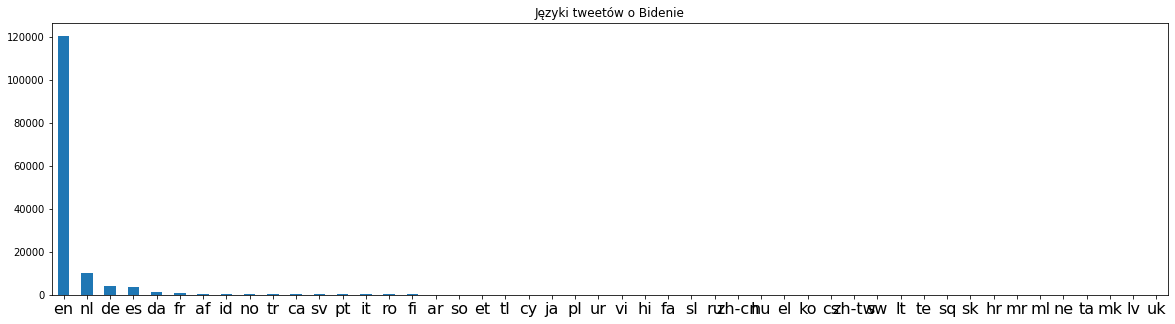

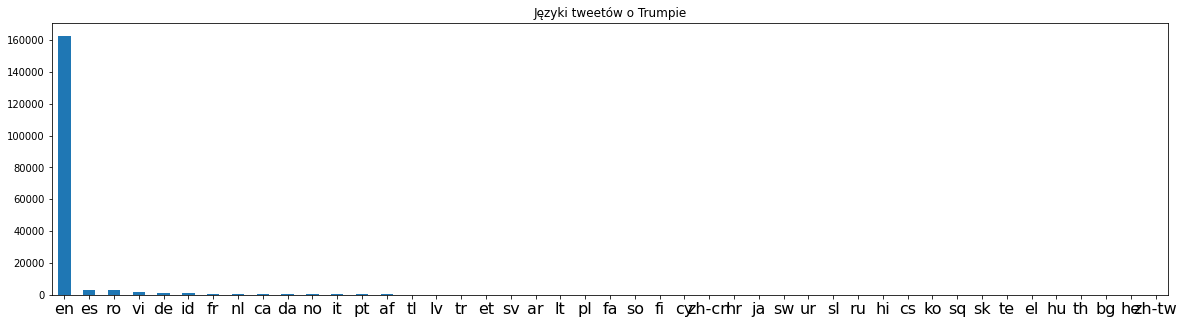

In [ ]:
plt.figure(figsize=(20,5))
ax = unique_biden.lang.value_counts().plot.bar(rot=0)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.title('Języki tweetów o Bidenie')
plt.show()

plt.figure(figsize=(20,5))
ax = unique_trump.lang.value_counts().plot.bar(rot=0)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.title('Języki tweetów o Trumpie')
plt.show()



> Co ciekawe, poza angielskim, z terenu USA o Bidenie pisali częściej po holendersku, niemiecku i duńsku, a o Trumpie – po hiszpańsku, rumuńsku i wietnamsku.

W dalszej pracy działamy tylko na angielskojęzycznych tweetach.



In [ ]:
tweets_en_biden = unique_biden[unique_biden.lang == 'en']
tweets_en_trump = unique_trump[unique_trump.lang == 'en']

In [ ]:
print('Trump: ', tweets_en_trump.shape)
print('Biden: ', tweets_en_biden.shape)

Trump:  (162550, 24)
Biden:  (120262, 24)


In [ ]:
tweets_en_biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,"A Silicon Valley #independent #News #Media #Startup\n *If you have any tips you'd like us to cover, please DM or tag us*",2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en
21,2020-10-15 00:01:42,1.316530e+18,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,"#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illinois_Alma @UIJournalism '23 🔶, @ParklandCollege '21 🐍\nPrevious work: @WGCYRadio.",2019-08-24 04:25:30,954.0,"Champaign, IL",40.116420,-88.243383,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en
22,2020-10-15 00:01:47,1.316530e+18,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,2019-06-15 18:24:44,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en
23,2020-10-15 00:01:50,1.316530e+18,#JoeBiden calls him a lier and then insults him for being overweight. Biden shows his low IQ daily. Maybe Joe should hold town halls in kindergarten. He’ll be amongst equals and no one will say anything when he takes his afternoon nap https://t.co/Mr2nh102nG,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,NaN,2012-09-17 04:52:42,15.0,United States,39.783730,-100.445882,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776836,2020-11-08 23:55:24,1.325588e+18,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | #WeThePeopleHaveSpoken #JoeBiden #KamalaHarris 👍🏽😎 https://t.co/Ck1aAew9ra",1.0,0.0,Twitter for iPhone,1.057408e+09,PROJECT13 MAG,PROJECT13MAG,"Sports | Motorsports | ET, Indie Film & Foodie | CAL1850 Community | 👉🏾Youtube Ch: Project13 Magazine | IG https://t.co/NjgTF6NK5s",2013-01-03 10:12:09,8881.0,LOS ANGELES,34.053691,-118.242766,Los Angeles,United States of America,North America,California,CA,2020-11-09 18:32:45.562902000,2020-11-08 23,11-08,en
776845,2020-11-08 23:56:15,1.325588e+18,Will #criticalRaceTheory become ubiquitous in a #Biden-Harris administration? https://t.co/20EbmT9Nrt,0.0,0.0,Twitter Web App,4.095715e+08,Howard Wachtel,mindovermath,"Retired college #math professor. Single. Bridge enthusiast, Schlager music fan, #Flyers and #Phillies fan. #MAGA #TrumpTrain.",2011-11-10 22:57:16,12606.0,"Philadelphia, PA",39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.773127000,2020-11-08 23,11-08,en
776847,2020-11-08 23:56:21,1.32

In [ ]:
# pobranie danych do plików CSV
tweets_en_biden.to_csv('tweets_en_biden.csv')
tweets_en_trump.to_csv('tweets_en_trump.csv')

# NLP

Za pomocą technik Natural Language Processing postaramy się maksymalnie uprościć zbiory słów i znaków z których składają się pobrane tweety, ponieważ nie wszystko przyda się w dalszej analizie, a niektóre składowe (typu hasztagi lub linki na zewnętrzne strony) mogą negatywnie wpłynąć na wyniki modeli uczenia maszynowego, które można by było na danych zbiorach zbudować.

In [ ]:
# Wczytywanie danych
tweets_en_biden = pd.read_csv('tweets_en_biden.csv', lineterminator='\n', parse_dates=True)
tweets_en_trump = pd.read_csv('tweets_en_trump.csv', lineterminator='\n', parse_dates=True)

## Usuwanie znaków specjalnych

Pierwszym etapem NLP w naszej pracy jest usuwanie symboli specjalnych – rozmaitych znaków punktuacji. Takowe znaki nie niosą ze sobą istotnych informacji w ogólnym sensie wypowiedzi. Ze względu na brak spacji między słowem a znakiem podobne połączenia mogą być rozpoznane przez algorytm jako jedność.

---
Wynik można zobaczyć w nowo utworzonej kolumnie 'text_clean'.


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#punktuacja
def remove_punct (text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

tweets_en_biden['text_clean'] = tweets_en_biden['tweet'].apply(lambda x: remove_punct(x))
tweets_en_trump['text_clean'] = tweets_en_trump['tweet'].apply(lambda x: remove_punct(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21.000000000,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01.000000000,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30.000000000,954.0,"Champaign, IL",40.116421,-88.243383,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,2019-06-15 18:24:44.000000000,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,NaN,2012-09-17 04:52:42.000000000,15.0,United States,39.783730,-100.445882,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...


## Tokenizacja

Tokenizacja skupia się na rozdzieleniu ciągów znaków na słowa za pomocą biblioteki **re**.  Wszystkie litery w tweetach od tej pory będą tylko małe, tak żeby Python nie rozpoznawał, na przykład, słowa "Python" i "python" jako różne.

---
Wynik tokenizacji można zobaczyć w kolumnie 'text_tokenized'.


In [ ]:
def tokenize(text):
    tokens = re.split('\W+', text) # oddzielenie spacji
    return tokens

# oddzielene dużych i małych liter + wszystko zapisane małymi literami
tweets_en_biden['text_tokenized'] = tweets_en_biden['text_clean'].apply(lambda x: tokenize(x.lower()))
tweets_en_trump['text_tokenized'] = tweets_en_trump['text_clean'].apply(lambda x: tokenize(x.lower()))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21.000000000,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ..."
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01.000000000,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30.000000000,954.0,"Champaign, IL",40.116421,-88.243383,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,2019-06-15 18:24:44.000000000,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,NaN,2012-09-17 04:52:42.000000000,15.0,United States,39.783730,-100.445882,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins..."


## Usuwamy zbyt krótkie i długie słowa i ciągi 'http '

Ze zbioru usuwamy ciągi znaków, składających się ze zbyt małej (< 3) lub zbyt dużej liczby znaków (> 11), ponieważ zbyt krótkie słowa najczęściej są stop-słowami lub nie wprowadzają nowego znaczenia w tekst, a zwiększają liczbę zmiennych w dalszym badaniu. Natomiast długie słowa w przypadku tweetów najczęściej są hasztagami(#) lub odniesieniami do kont użytkowników (@). 

---
Tutaj warto zaznaczyć, że jeśli tematem badania byłyby tweety po niemiecku, to górny limit dlugości słów raczej nie zostałby wyznaczony ;)


In [ ]:
# usuwamy krótkie i długie słowa
def short_long(text):
  text = [word for word in text if (len(word)>2 and len(word)<12)]
  return text


tweets_en_biden['no_long_short'] = tweets_en_biden['text_tokenized'].apply(lambda x: short_long(x))
tweets_en_trump['no_long_short'] = tweets_en_trump['text_tokenized'].apply(lambda x: short_long(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21.000000000,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01.000000000,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30.000000000,954.0,"Champaign, IL",40.116421,-88.243383,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,2019-06-15 18:24:44.000000000,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,NaN,2012-09-17 04:52:42.000000000,15.0,United States,39.783730,-100.445882,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult..."


W następnym kroku pozbędziemy się wszystkich ciągów, rozpoczynających się z 'http' – adresy stron zewnętrznych nie są nam potrzebne w badaniu. Wynik – kolumna 'no_http'.

In [ ]:
# usuwamy ciagi 'http'
def remove_http(text):
  text = [word for word in text if not word.startswith('http')]
  return text


tweets_en_biden['no_http'] = tweets_en_biden['no_long_short'].apply(lambda x: remove_http(x))
tweets_en_trump['no_http'] = tweets_en_trump['no_long_short'].apply(lambda x: remove_http(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21.000000000,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01.000000000,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30.000000000,954.0,"Champaign, IL",40.116421,-88.243383,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,2019-06-15 18:24:44.000000000,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,NaN,2012-09-17 04:52:42.000000000,15.0,United States,39.783730,-100.445882,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult..."


## Usuwamy stopwords

Stop-słowa to słowa, które nie wnoszą dodatkowych informacji do tekstu z punktu widzenia logiki i przekazu, jak również nie niosą za sobą żadnych istotnych treści. Zatem najczęściej są to zaimki, przyimki, liczebniki itp. Słowa te są pomijane przez wyszukiwarki. Biblioteka *nltk* posiada listę takich słów w języku angielskim, z której skorzystamy w następnym kroku.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords (tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

tweets_en_biden['text_nostop'] = tweets_en_biden['no_http'].apply(lambda x: remove_stopwords(x))
tweets_en_trump['text_nostop'] = tweets_en_trump['no_http'].apply(lambda x: remove_stopwords(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http,text_nostop
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21.000000000,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]","[meidastouch, biden, made]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01.000000000,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30.000000000,954.0,"Champaign, IL",40.116421,-88.243383,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,...","[effort, find, truth, allegations, twitter, is..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,2019-06-15 18:24:44.000000000,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ...","[twitter, everything, help, democrats, win, el..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,NaN,2012-09-17 04:52:42.000000000,15.0,United States,39.783730,-100.445882,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, lier, insults, overweight, b..."


## Lemmatyzacja (sprowadza do początkowej formy słowa)

Słowa mogą mieć różne formy, na przykład *cat* i *cats*, *come* i *comes*. Aby prowadzić takie słowa do jednej formy (ponieważ mają lub mogą mieć identyczny sens), można na dwa sposoby:

1.   Stemmatyzacja - sprowadzenie wyrazu reprezentującego dowolną część mowy do stemu, rdzenia postaci źródłowej, najczęściej rzeczownika, bądź niekiedy nawet sekwencji znaków nie mającej samodzielnego znaczenia w języku naturalnym.
2.   Lemmatyzacja – algorytm znajdowania lematu, formy podstawowej wyrazu w obszarze części mowy którą reprezentuje. Inaczej: wyszukiwanie formy kanonicznej leksemu. W komputerowej analizie języka naturalnego lemmatyzacja jest operacją bardziej precyzyjną niż stemmatyzacja.

Dotychczasowo zdobyte (wyjątkowo niewielkie) doświadczenie sugeruje, że w pewnym sensie wadą stemmatyzacji jest redukcja słów do (pseudo)łodyg a nie całych słów - co nie zawsze dobrze prezentuje się w dalszych analizach oraz wizualizacjach, jednak dzięki temu modele zawierają mniej zmiennych zero-jedynkowych. Natomiast lemmatyzacja w wyniku operacji daje całe poprawne słownikowo słowo, ale zwykle nie wyłapuje wszystkich podobnych słów, co w dalszej kolejności skutkuje tym, że zmiennych w modelu jest o 10-15% więcej. 



In [ ]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizing (text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweets_en_biden['text_lemmatized'] = tweets_en_biden['text_nostop'].apply(lambda x: lemmatizing(x))
tweets_en_trump['text_lemmatized'] = tweets_en_trump['text_nostop'].apply(lambda x: lemmatizing(x))

tweets_en_biden.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http,text_nostop,text_lemmatized
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21.000000000,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]","[meidastouch, biden, made]","[meidastouch, biden, made]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01.000000000,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30.000000000,954.0,"Champaign, IL",40.116421,-88.243383,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,...","[effort, find, truth, allegations, twitter, is...","[effort, find, truth, allegation, twitter, isn..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,2019-06-15 18:24:44.000000000,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ...","[twitter, everything, help, democrats, win, el...","[twitter, everything, help, democrat, win, ele..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,NaN,2012-09-17 04:52:42.000000000,15.0,United States,39.783730,-100.445882,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, lier, insults, overweight, b...","[joebiden, call, lier, insult, overweight, bid..."


In [ ]:
#znowu pobieramy dane do plików CSV
tweets_en_biden.to_csv('tweets_en_biden_lemm.csv')
tweets_en_trump.to_csv('tweets_en_trump_lemm.csv')

## Chmury słów

In [ ]:
# Wczytywanie danych
tweets_en_biden = pd.read_csv('tweets_en_biden_lemm.csv', lineterminator='\n', parse_dates=True)
tweets_en_trump = pd.read_csv('tweets_en_trump_lemm.csv', lineterminator='\n', parse_dates=True)

W celu wizualizacji danych zastosowano chmury słów. Przedstawione w nich dane ukazują najczęściej występujące słowa w udostępnionych tweetach na temat danych kandydatów. Każda z chmur zawiera w sobie 50 najczęściej występujących słów. Wielkość czcionki świadczy o częstości występowania słowa.

In [ ]:
# chmury słów
biden = tweets_en_biden.loc[tweets_en_biden['country'] == 'United States of America']['text_lemmatized']
trump = tweets_en_trump.loc[tweets_en_trump['country'] == 'United States of America']['text_lemmatized']

In [ ]:
biden

0                          ['meidastouch', 'biden', 'made']
1         ['censorship', 'hunterbiden', 'biden', 'bidene...
2         ['effort', 'find', 'truth', 'allegation', 'twi...
3         ['twitter', 'everything', 'help', 'democrat', ...
4         ['joebiden', 'call', 'lier', 'insult', 'overwe...
                                ...                        
120257     ['biden', 'image', 'santa', 'maria', 'joebiden']
120258              ['become', 'ubiquitous', 'bidenharris']
120259                          ['moving', 'near', 'biden']
120260    ['flotus', 'excited', 'flotus', 'whose', 'vagi...
120261                  ['man', 'need', 'helpusa', 'biden']
Name: text_lemmatized, Length: 120262, dtype: object

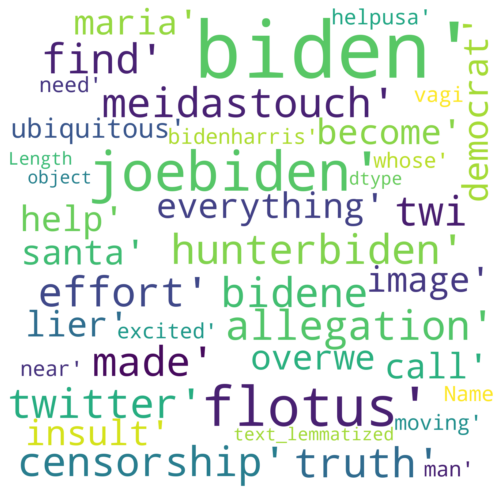

In [ ]:
# wordcloud Bidena

plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=50,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(biden.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

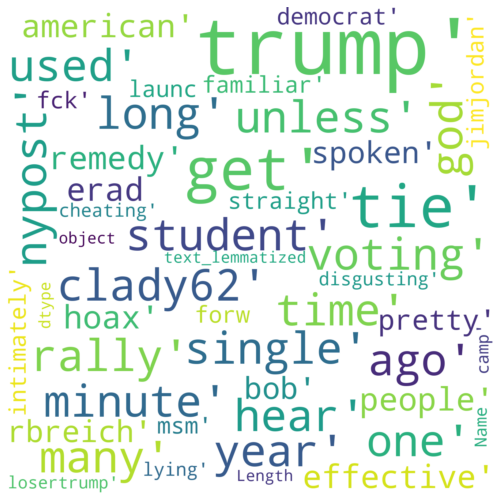

In [ ]:
# wordcloud Trumpa

plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=50,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(trump.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

## N-gramy

W następnej wizualizacji przedstawiono najczęściej występujące w tweetach 2-gramy i 3-gramy. W celu zwiększenia wartości semantycznej wyniku ze zbioru usunięto n-gramy, połączenia słów typu "joe, biden", "donald, "trump". Takowe n-gramy zajmowały w wysokie miejsca w rankigu częstości występowania słów, a ich wartość informacyjna w analizie sentymentu jest znikoma.

In [ ]:
text_biden = tweets_en_biden['text_clean']
text_trump = tweets_en_trump['text_clean']

In [ ]:
def clean1(sent):
    filtered_sent=""
    stopwords = nltk.corpus.stopwords.words('english')
    sent = (unicodedata.normalize('NFKD', sent)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    sent = re.sub(r'#.+|https.+|[^(a-zA-Z)\s]','',sent)
    words=sent.split()
    for word in words:
        if word not in stopwords:
            filtered_sent=filtered_sent+' '+word
    return filtered_sent

def clean2(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

words_biden = clean2(''.join(str(text_biden.apply(clean1).tolist())))
words_trump = clean2(''.join(str(text_trump.apply(clean1).tolist())))
words_biden[:10]

['islandgirlprv',
 'bradbeauregardj',
 'meidastouch',
 'biden',
 'made',
 'trumpisnotamerica',
 'censorship',
 'hunterbiden',
 'biden',
 'bidenemails']

In [ ]:
words_biden2, words_trump2 = [],[]

In [ ]:
# usuwamy słowa, które jednakowo często spotykają się w obydwóch zbiorach
for i in words_biden:
  if i != 'trump' and i!='donald':
    if i!= 'biden' and i != 'joe':
      if i != 'joebiden' and i != 'donaldtrump':
        if i != 'election' and i != 'vote':
          if i != 'u' and i != 'win':
            if i != 'like' and i!= 'amp':
              words_biden2.append(i)

for i in words_trump:
  if i != 'trump' and i!='donald':
    if i!= 'biden' and i != 'joe':
      if i != 'joebiden' and i != 'donaldtrump':
        if i != 'election' and i != 'vote':
          if i != 'u' and i != 'win':
            if i != 'like' and i!= 'amp':
              words_trump2.append(i)

In [ ]:
words_biden2[:20]

['islandgirlprv',
 'bradbeauregardj',
 'meidastouch',
 'made',
 'trumpisnotamerica',
 'censorship',
 'hunterbiden',
 'bidenemails',
 'bidenemail',
 'corruption',
 'effort',
 'find',
 'truth',
 'allegation',
 'twitter',
 'isnt',
 'allowing',
 'people',
 'share',
 'link']

In [ ]:
# Uzyskanie najlpeszych 10 bi- oraz tri-gramów z oczyszczonych danych

biden_2ngrams=(pd.Series(nltk.ngrams(words_biden2, 2)).value_counts())[:10]
trump_2ngrams=(pd.Series(nltk.ngrams(words_trump2, 2)).value_counts())[:10]
biden_3ngrams=(pd.Series(nltk.ngrams(words_biden2, 3)).value_counts())[:10]
trump_3ngrams=(pd.Series(nltk.ngrams(words_trump2, 3)).value_counts())[:10]

# Wprowadzenie bi- i tri-gramów do dataframe, aby umożliwić utworzenie grafów
biden_ngrams=pd.concat([biden_2ngrams,biden_3ngrams])
trump_ngrams=pd.concat([trump_2ngrams,trump_3ngrams])

In [ ]:
def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

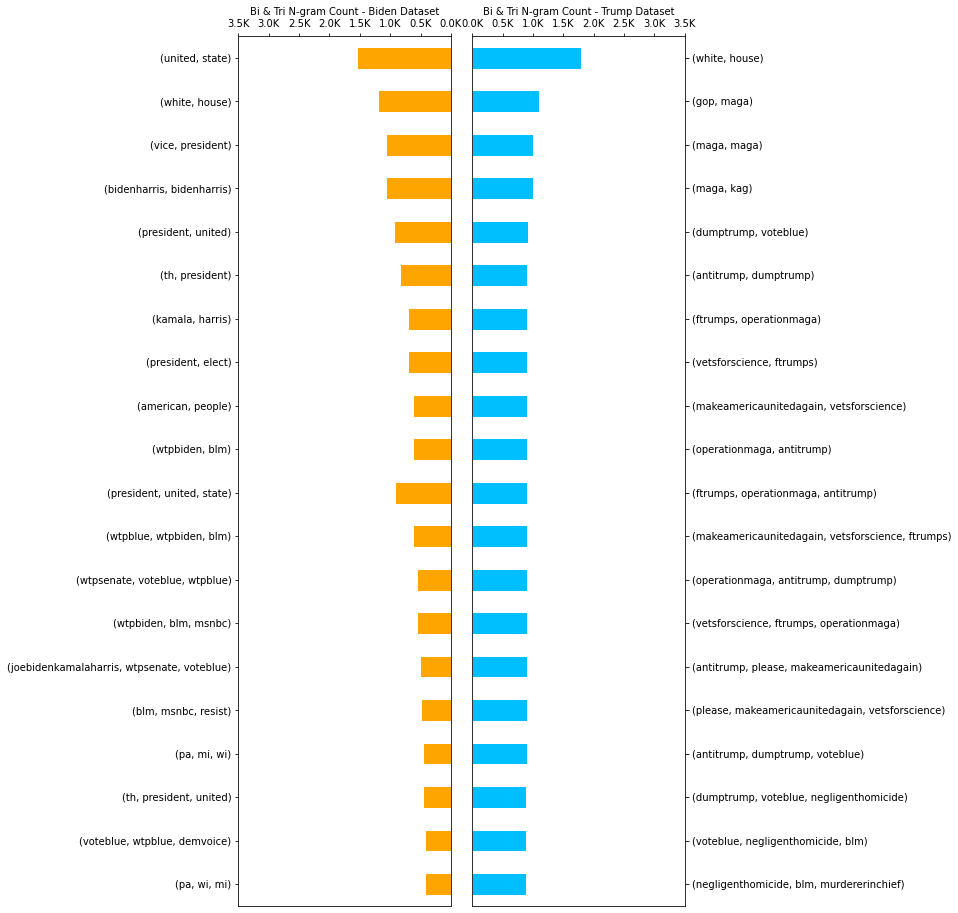

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(8,16), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
biden_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Bi & Tri N-gram Count - Biden Dataset')
barh_ax.set_ylabel('')

barh_ax = ax[1]
trump_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[6],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Bi & Tri N-gram Count - Trump Dataset')
barh_ax.set_ylabel('')
plt.show()




*   Z danej wizualizacji od razu widać, że badamy właśnie tweety, ponieważ jest dużo słów, przedstawiających sobą różne polityczne hasła i skróty typu "maga"( "Make America Great Again"), "blm" ("Black Lifes Matter"), "antitrump", "dumptrump", "voteblue", "gop" ("grand old party" - republican). 
*   Poza tym w tweetach o Bidenie często była mowa również o przyszłej, jak już wiemy, wiceprezydentce Kamali Harris.



# ANALIZA SENTYMENTU

In [ ]:
biden

0                          ['meidastouch', 'biden', 'made']
1         ['censorship', 'hunterbiden', 'biden', 'bidene...
2         ['effort', 'find', 'truth', 'allegation', 'twi...
3         ['twitter', 'everything', 'help', 'democrat', ...
4         ['joebiden', 'call', 'lier', 'insult', 'overwe...
                                ...                        
120257     ['biden', 'image', 'santa', 'maria', 'joebiden']
120258              ['become', 'ubiquitous', 'bidenharris']
120259                          ['moving', 'near', 'biden']
120260    ['flotus', 'excited', 'flotus', 'whose', 'vagi...
120261                  ['man', 'need', 'helpusa', 'biden']
Name: text_lemmatized, Length: 120262, dtype: object

### TEXT BLOB

Dla analizy sentymentu skorzystaliśmy z zalecanej nam na zajęciach biblioteki TextBlob. Ona pozwala na automatyczne ustalenie poziomu sentymentu każdej wypowiedzi/tweeta (polarność, w skali od negatywnego do pozytywnego) i subiektywizmu (w skali od opinii do faktu).

In [ ]:
tweets_biden_blob = tweets_en_biden['text_clean'].to_frame()
tweets_trump_blob = tweets_en_trump['text_clean'].to_frame()

tweets_biden_blob.head()

,text_clean
0,IslandGirlPRV BradBeauregardJ MeidasTouch This...
1,censorship HunterBiden Biden BidenEmails Biden...
2,In an effort to find the truth about allegatio...
3,Twitter is doing everything they can to help D...
4,JoeBiden calls him a lier and then insults him...


In [ ]:
#Wyznaczenie sentymentu oraz subiektywizmu wypowiedzi
tweets_biden_blob['polarity'] = tweets_biden_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_biden_blob['subjectivity'] = tweets_biden_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
biden_blob = tweets_biden_blob.sample(1000)

tweets_trump_blob['polarity'] = tweets_trump_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_trump_blob['subjectivity'] = tweets_trump_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
trump_blob = tweets_trump_blob.sample(1000)

trump_blob.head()

,text_clean,polarity,subjectivity
107243,Trump warns supporters in Pennsylvania that De...,0.000000,0.000000
5362,Hey conservatives and singleissuevoters you kn...,0.285714,0.535714
54271,By the look of all the mail in ballots so far ...,0.158333,0.548148
76101,If you vote for a con artist and a clown well ...,-0.400000,0.400000
57953,2020 JoeBiden Trump this is the most dangerous...,-0.050000,0.700000


### Wizualizacje sentymentu

Mimo redukcji liczebności tweetów ich ilość nadal pozostaje na wysokim poziomie, z tego względu przygotowanie odpowiedniej wizualizacji analizy sentymentu było wyjątkowo kosztowne czasowo. Dlatego też postanowiono wybrać losową próbę 1000 tweetów, aby proces tworzenia wizualizacji odbył się odpowiednio sprawniej.

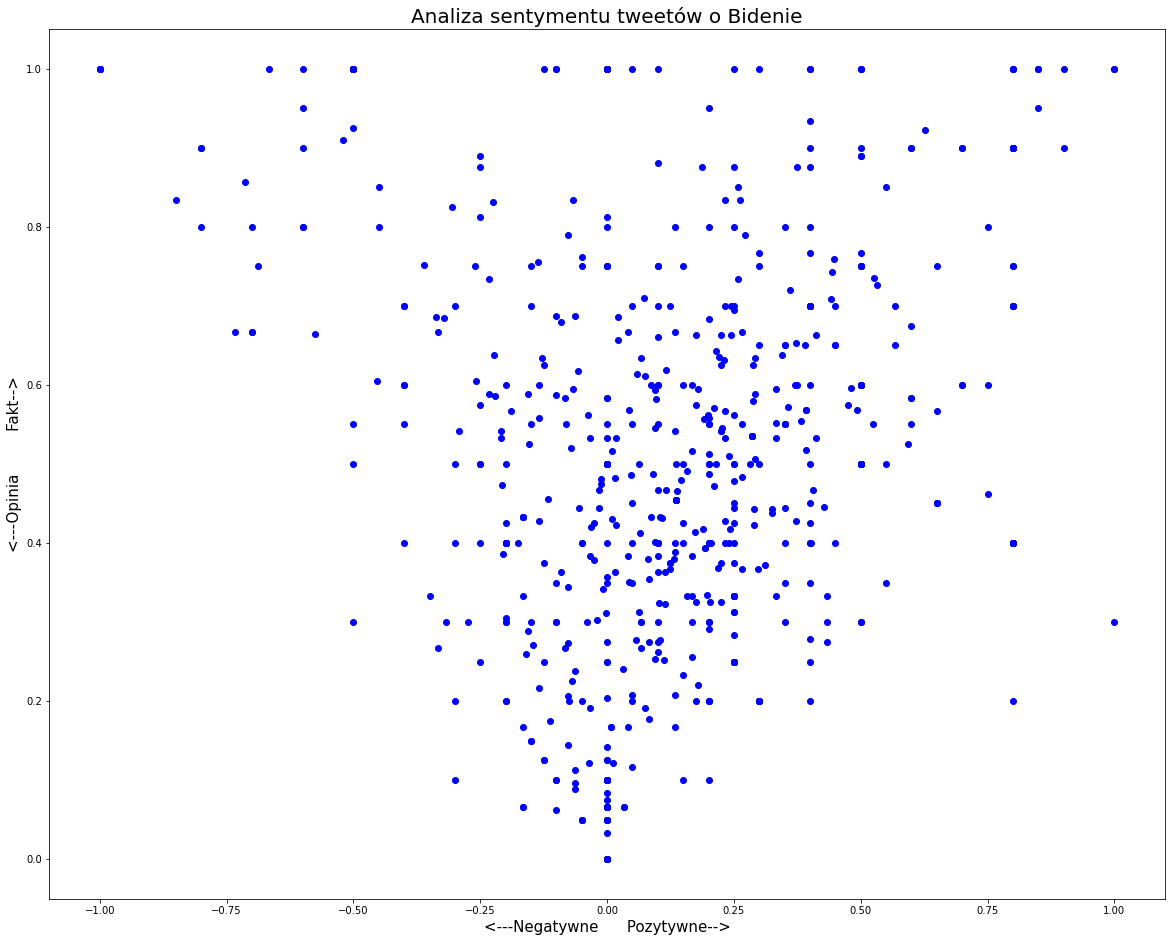

In [ ]:
#Wizualizacja otrzymanych wyników
plt.figure(figsize=[20, 16])

for index, row in enumerate(biden_blob.index):
    x = biden_blob.polarity.loc[row]
    y = biden_blob.subjectivity.loc[row]
    plt.scatter(x, y, color='blue')
    
plt.title('Analiza sentymentu tweetów o Bidenie', fontsize=20)
plt.xlabel('<---Negatywne      Pozytywne-->', fontsize=15)
plt.ylabel('<---Opinia         Fakt-->', fontsize=15)

plt.show()

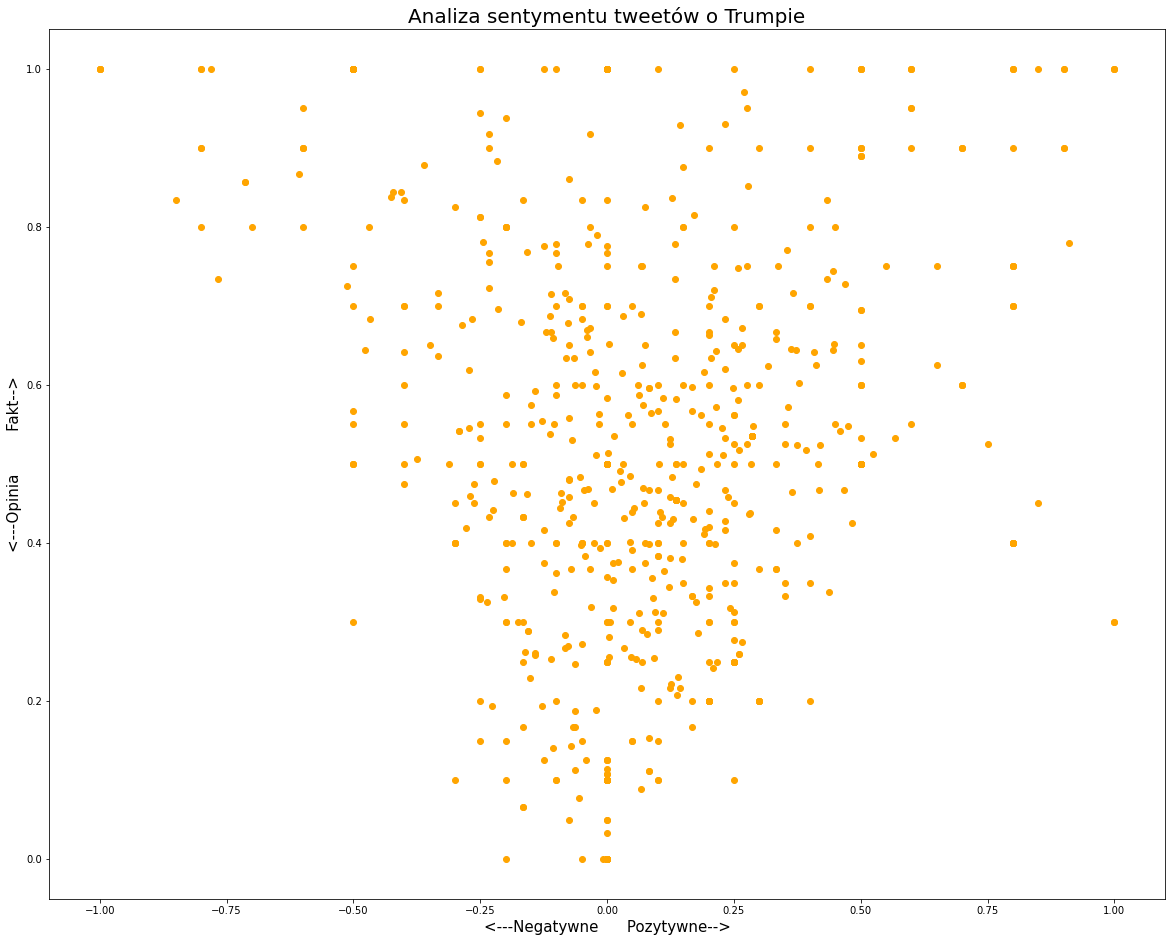

In [ ]:
#Wizualizacja otrzymanych wyników
plt.figure(figsize=[20, 16])

for index, row in enumerate(trump_blob.index):
    x = trump_blob.polarity.loc[row]
    y = trump_blob.subjectivity.loc[row]
    plt.scatter(x, y, color='orange')
    
plt.title('Analiza sentymentu tweetów o Trumpie', fontsize=20)
plt.xlabel('<---Negatywne      Pozytywne-->', fontsize=15)
plt.ylabel('<---Opinia         Fakt-->', fontsize=15)

plt.show()

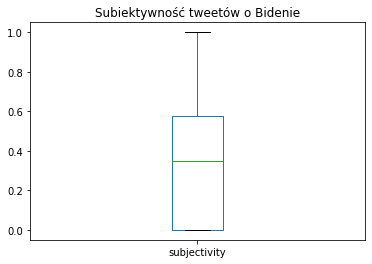

In [ ]:
# wykresy pudełkowe analizy sentymentu 
tweets_biden_blob.subjectivity.plot.box(title='Subiektywność tweetów o Bidenie')

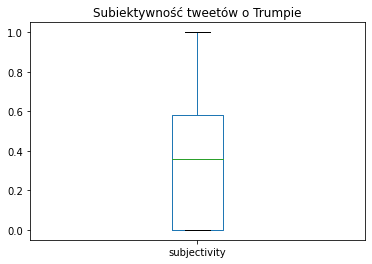

In [ ]:
tweets_trump_blob.subjectivity.plot.box(title='Subiektywność tweetów o Trumpie')

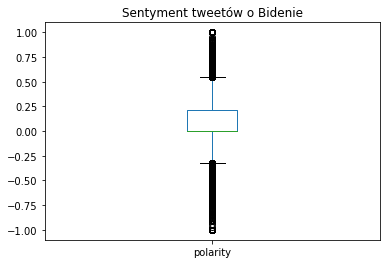

In [ ]:
tweets_biden_blob.polarity.plot.box(title='Sentyment tweetów o Bidenie')

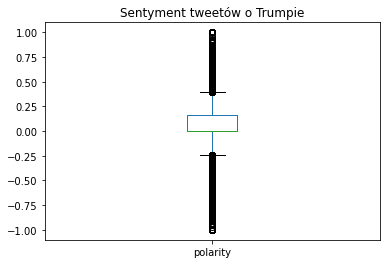

In [ ]:
tweets_trump_blob.polarity.plot.box(title='Sentyment tweetów o Trumpie')

Zbiory tweetów mają bardzo zbliżone mediany sentymentu, jedyną różnice można zauważyć między zakresami międzykwartylowymi polarności dwóch zbiorów – zakres Q3-Q1 tweetów o Bidenie jest odrobinę szerszy.

In [ ]:
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
tweets_biden_blob['analysis'] = tweets_biden_blob['polarity'].apply(getAnalysis)
tweets_trump_blob['analysis'] = tweets_trump_blob['polarity'].apply(getAnalysis)
tweets_biden_blob.head()

,text_clean,polarity,subjectivity,analysis
0,IslandGirlPRV BradBeauregardJ MeidasTouch This...,0.00,0.000000,neutral
1,censorship HunterBiden Biden BidenEmails Biden...,0.00,0.000000,neutral
2,In an effort to find the truth about allegatio...,0.00,0.000000,neutral
3,Twitter is doing everything they can to help D...,0.14,0.617778,positive
4,JoeBiden calls him a lier and then insults him...,0.00,0.150000,neutral


In [ ]:
# wykresy słupkowe
from collections import Counter

target_biden = Counter(tweets_biden_blob.analysis)

plt.figure(figsize=(16,8))
plt.bar(target_biden.keys(), target_biden.values())
plt.title("Rozkład sentymentu w tweetach o Bidenie")

Text(0.5, 1.0, 'Rozkład sentymentu w tweetach o Trumpie')

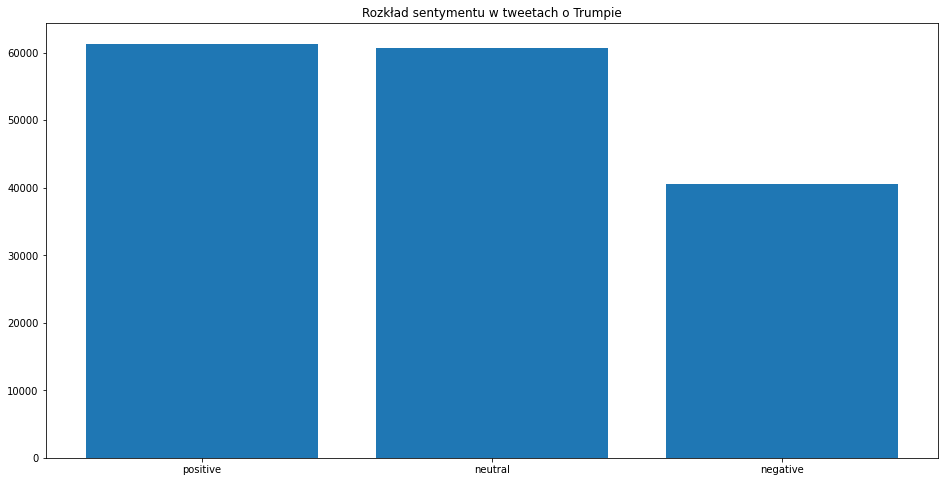

In [ ]:
target_trump = Counter(tweets_trump_blob.analysis)

plt.figure(figsize=(16,8))
plt.bar(target_trump.keys(), target_trump.values())
plt.title("Rozkład sentymentu w tweetach o Trumpie")

### Piramida sentymentu – czy wyniki były sfałszowane?

Za pomocą ostatniej wizualizacji postaramy się porównać oficjalne wyniki wyborów w USA i rozkład ocen sentymentu zebranych tweetów.

In [ ]:
import plotly.graph_objects as go

In [ ]:
#piramida Bidena
general  = tweets_biden_blob.groupby('analysis').analysis.count()
neutral  = tweets_biden_blob[tweets_biden_blob['analysis'] == 'neutral'].text_clean.count()
positive = tweets_biden_blob[tweets_biden_blob['analysis'] == 'positive'].text_clean.count()
negative = tweets_biden_blob[tweets_biden_blob['analysis'] == 'negative'].text_clean.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["pozytywne","negatywne","neutralne"], values = [positive,negative,neutral])])
fig.update_layout(title_text = 'Rozkład sentymentu tweetów o Bidenie')
fig.show()

In [ ]:
#piramida Trumpa
general  = tweets_trump_blob.groupby('analysis').analysis.count()
neutral  = tweets_trump_blob[tweets_trump_blob['analysis'] == 'neutral'].text_clean.count()
positive = tweets_trump_blob[tweets_trump_blob['analysis'] == 'positive'].text_clean.count()
negative = tweets_trump_blob[tweets_trump_blob['analysis'] == 'negative'].text_clean.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["pozytywne","negatywne","neutralne"], values = [positive,negative,neutral])])
fig.update_layout(title_text = 'Rozkład sentymentu tweetów o Trumpie')
fig.show()

 

> 43% tweetów o Bidenie zawierały pozytywne informacje, natomiast o Trumpie tylko 37.7%.

> Biden miał mniej negatywnych tweetów, niż Trump – 19.2% w stosunku do 24.9%.

> Liczba wypowiedzeń neutralnych jest prawie równa – 37.8% dla Bidena i 37.3% dla Trumpa.







To pokrywa się z oficjalnymi wynikami wyborów. Oczywiście, to nie daje nam prawa do udowodnienia, że głosy były sprawiedliwie policzone, ale przynajmniej nie daje powodu aby w takowe postulaty wierzyć (postulaty świadczące o wadliwym policzeniu głosów na szeroką skalę).

# WNIOSKI



1.   Większość tweetów (na temat obu kandydatów) została opublikowana poprzez stronę internetową Twittera. Następne w kolejności częstotliwości używania były aplikacje mobilne na iPhone oraz Android.

2. W większości przypadków tweety nie zawierały geotaga, natomiast tweety, które posiadały takowy geotag w większości pochodziły z USA. Kolejnymi popularnymi lokalizacjami udostępniania wpisów były: UK, Kanada, Niemcy i Francja.

3.   Możliwą do zaobserwowania była wyjątkowo duża liczba tweetów pochodzących z Europy Zachodniej , Indii, Wschodniego wybrzeża Australii, Meksyku, Wenezueli czy Kolumbii. Warto zwrócić uwagę, że nie w każdym stanie USA użytkownicy zamieszczali wpisy z tą samą częstotliwością.

4. Głównym językiem debaty publicznej był angielski. W stosunku do wpisów zamieszczonych z terytorium USA, o Bidenie pisano (po angielskim) również po holendersku, niemiecku oraz duńsku, a o Trumpie – po hiszpańsku, rumuńsku i wietnamsku.

5. Liczba tweetów na godzinę, zawierających informacje o obu kandydatach, była stabilna w okresie całej kampanii wyborczej, za wyjątkiem okresu ostatniej debaty (23 października), a także zbliżającego się dnia wyborczego i okresu powyborczego (dane dostępne do 8 listopada). Naturalnie więcej tweetów pojawiało się w czasie dnia, a mniej w ciągu nocy - w odniesieniu do obu kandydatów.

6.  W tweetach na temat kandydatów jest dużo wyrażeń nacechowanych politycznie (polityczne hasła i tzw. skrótowce) typu "maga"( "Make America Great Again"), "blm" ("Black Lifes Matter"), "antitrump", "dumptrump", "voteblue", "gop" ("grand old party" - republican). Co więcej, w tweetach odnoszących się do Bidena często wspominano o przyszłej (a w tej chwili aktualnej) Wiceprezydentce Kamale Harris.

7. Zbiory tweetów mają bardzo zbliżone mediany sentymentu. Podstawową, a zarazem jedyną różnica występuje między zakresami międzykwartylowymi polarności dwóch zbiorów – zakres Q1-Q3 tweetów o Bidenie jest odrobinę szerszy. Oznacza to, że tweety na temat Bidena częściej miały pozytywny wydźwięk. 

8. Rozkład ocen sentymentu zebranych tweetów pokrywa się z oficjalnymi wynikami wyborów. Nie jest to wystarczające do stwierdzenia, że proces liczenia głosów przebiegał w pełni sprawiedliwie, jednakże nie daje powodów do zwątpienia w oficjalne wyniki.

